In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/segmentasi-pelanggan-final/segmentasi_pelanggan_final.csv


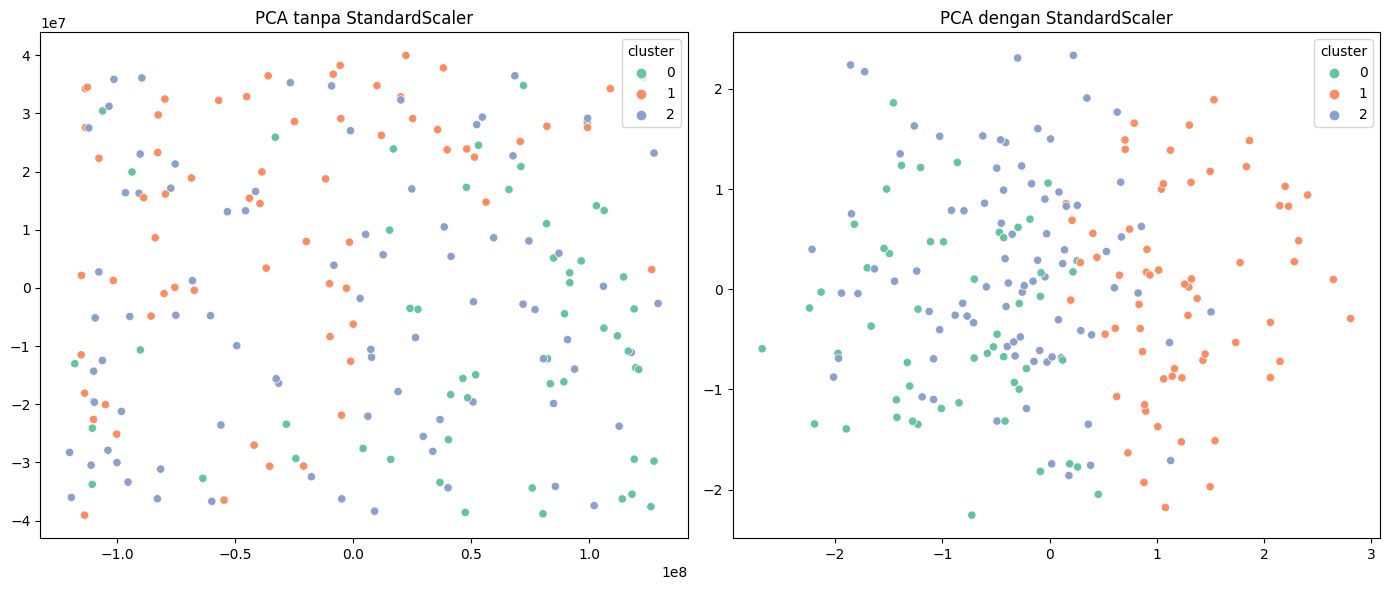

In [4]:
# Load data
df = pd.read_csv('/kaggle/input/segmentasi-pelanggan-final/segmentasi_pelanggan_final.csv')
# df.head()

features = ['pendapatan_bulanan', 'harga_mobil', 'uang_muka', 'keterlambatan_rata2', 'jumlah_kredit_aktif']
X = df[features]

# PCA tanpa StandardScaler
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)

# PCA dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=X_pca_raw[:, 0], y=X_pca_raw[:, 1], hue=df['cluster'], palette='Set2', ax=axes[0])
axes[0].set_title("PCA tanpa StandardScaler")

sns.scatterplot(x=X_pca_scaled[:, 0], y=X_pca_scaled[:, 1], hue=df['cluster'], palette='Set2', ax=axes[1])
axes[1].set_title("PCA dengan StandardScaler")

plt.tight_layout()
plt.show()